In [112]:
from PIL import Image
from torchvision import datasets , transforms
from matplotlib import pyplot as plt
from random import randint
import numpy as np

In [72]:
!git clone https://github.com/bar371/Malware-Detection.git

Cloning into 'Malware-Detection'...
remote: Enumerating objects: 8495, done.
remote: Total 8495 (delta 0), reused 0 (delta 0), pack-reused 8495
Receiving objects: 100% (8495/8495), 851.13 MiB | 39.98 MiB/s, done.
Resolving deltas: 100% (180/180), done.
Checking out files: 100% (9344/9344), done.


In [81]:
IM_SHAPE = (224, 224)
IM_DIM = (224,224,3)
data_transform = transforms.Compose([
        transforms.Resize(IM_SHAPE),
        transforms.ToTensor(),
    ])

images_dataset = datasets.ImageFolder(root="Malware-Detection/data/malimg_paper_dataset_imgs", transform=data_transform)


In [75]:
print(images_dataset)

Dataset ImageFolder
    Number of datapoints: 9339
    Root location: Malware-Detection
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )


In [103]:
def sample_random_images_from_diff_classes(n_classes, show=True):
  print(images_dataset)
  diff_label_types = set()
  imgs_to_return = []
  while len(diff_label_types) != n_classes:
    ind = randint(0, len(images_dataset)-1)
    # print(images_dataset[ind])
    class_n = str(images_dataset[ind][1])
    if class_n not in diff_label_types:
      diff_label_types.add(class_n)
      cur_image = images_dataset[ind][0]
      imgs_to_return.append(cur_image)
      if show:
        plt.imshow(cur_image.view(IM_DIM))
        plt.title("Binary Image of malware of class" + class_n)
        plt.show()
  return imgs_to_return

In [151]:
def create_mean_images_from_classes(images_dataset, show=False):
  label_dict = dict()
  samples_len = dict()
  for img in images_dataset:
    if img[1] not in label_dict.keys():
      label_dict[img[1]] = img[0]
      samples_len[img[1]] = 1
    else:
      label_dict[img[1]] += img[0]
      samples_len[img[1]] += 1

  for class_num, to_mean in label_dict.items():
      avg_image = (to_mean / samples_len[class_num]).reshape(IM_DIM)
      label_dict[class_num] = avg_image
      if show:
        plt.title("Mean Image of class " + str(class_num))
        plt.imshow(avg_image.view(IM_DIM), cmap='gray')  # print(len()
        plt.show()
  return label_dict

In [143]:
random_pics = sample_random_images_from_diff_classes(25, False) # show random pictures from each class

Dataset ImageFolder
    Number of datapoints: 9339
    Root location: Malware-Detection/data/malimg_paper_dataset_imgs
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )


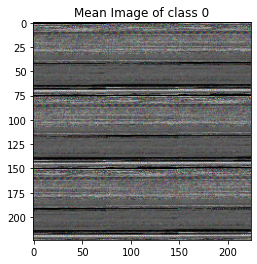

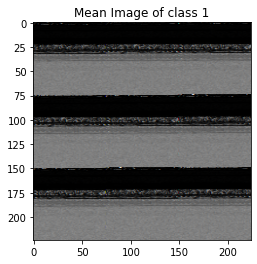

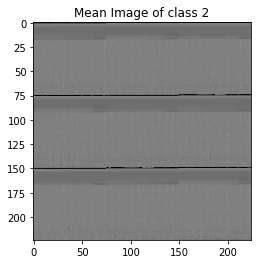

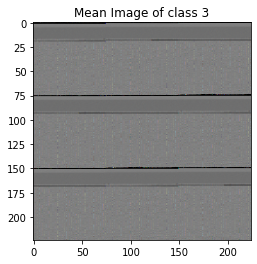

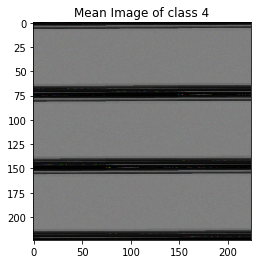

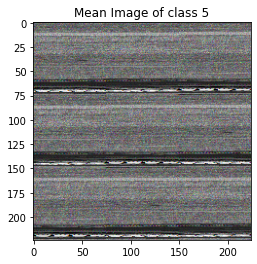

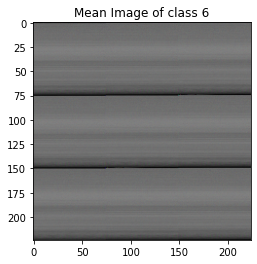

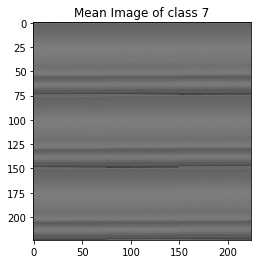

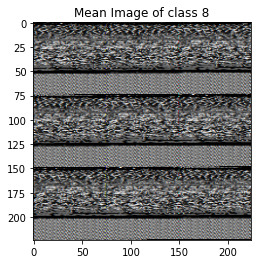

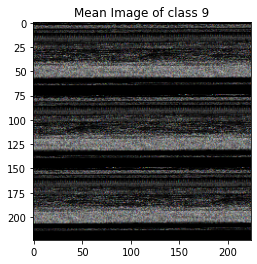

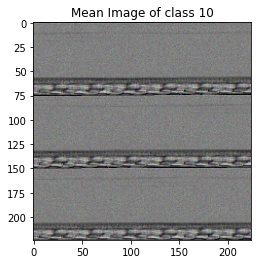

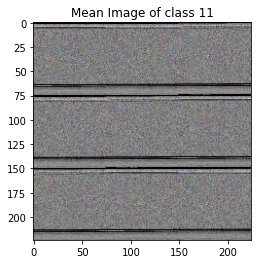

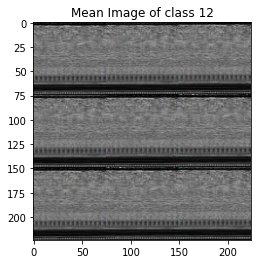

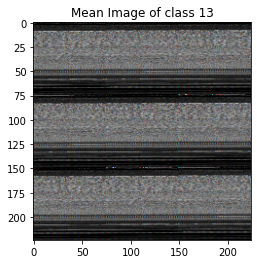

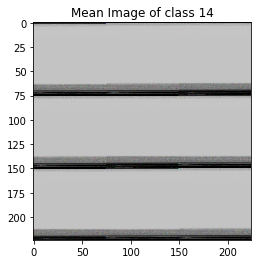

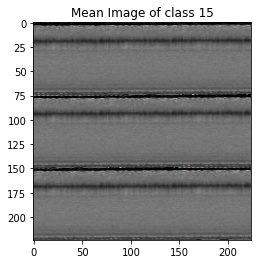

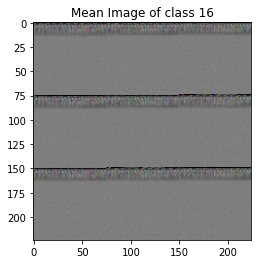

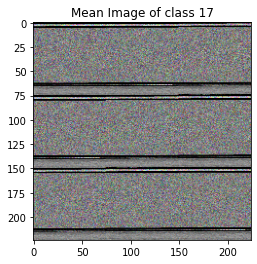

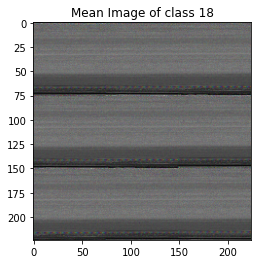

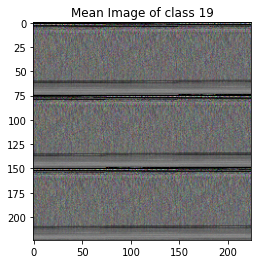

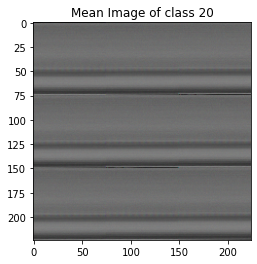

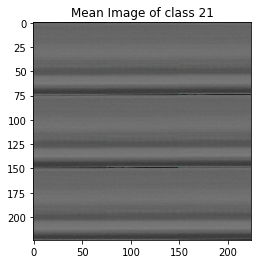

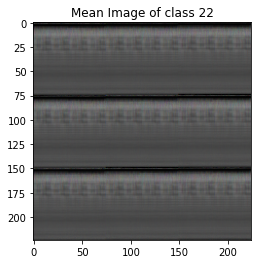

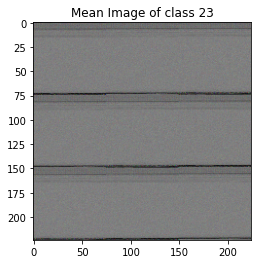

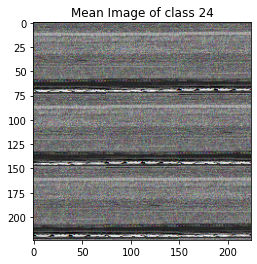

In [155]:
mean_dict = create_mean_images_from_classes(images_dataset, True)

In [222]:
def create_differntial_mean(mean_dict:dict, class_x, class_y):
  contrast_mean = mean_dict[class_x] - mean_dict[class_y]
  contrast_mean = contrast_mean.reshape((336, 448))
  plt.title("Contrast Mean of class {} and class {} ".format(class_x, class_y))
  plt.imshow(contrast_mean.view((336, 448)), cmap='bwr')  # print(len()
  plt.show()
  


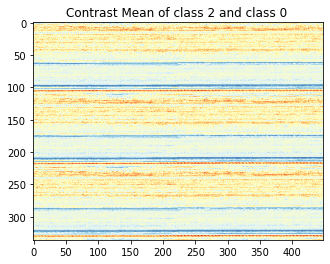

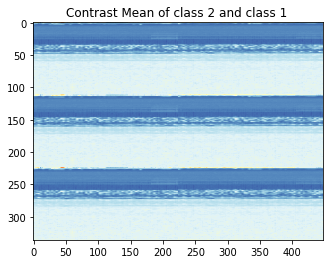

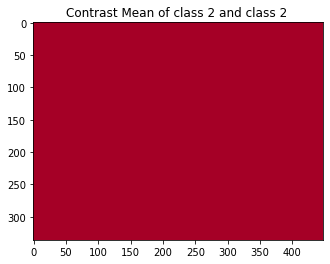

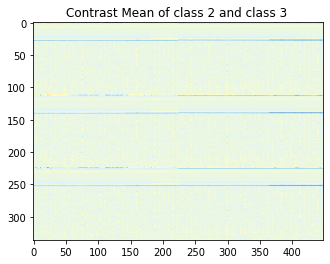

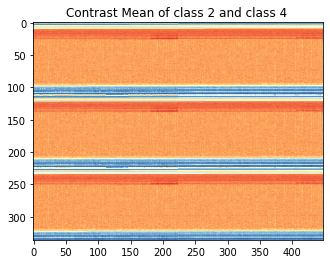

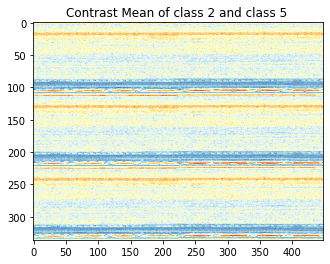

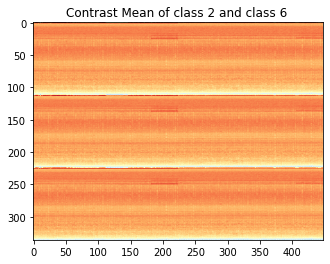

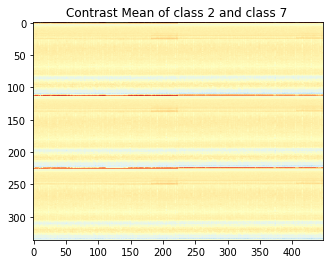

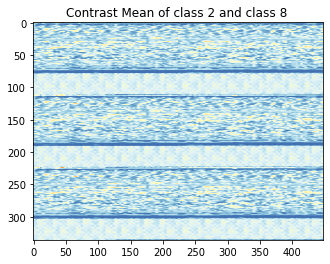

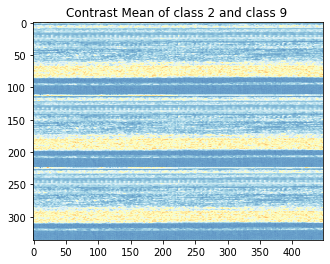

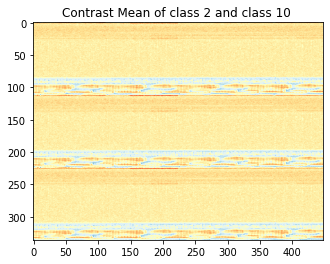

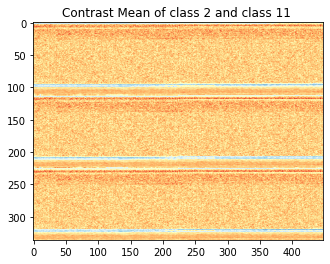

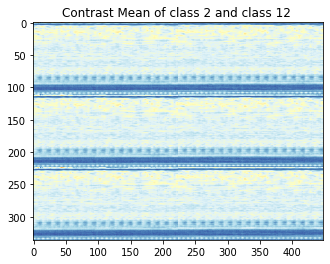

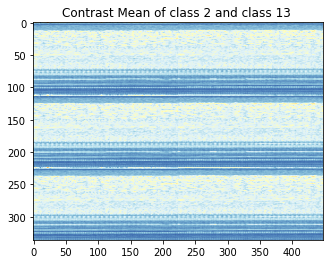

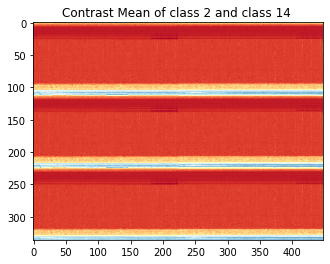

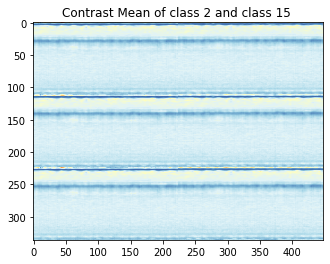

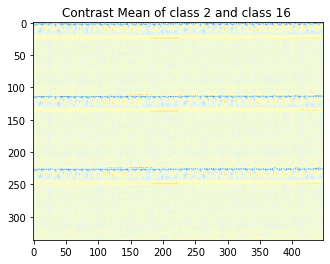

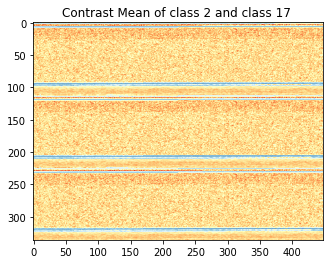

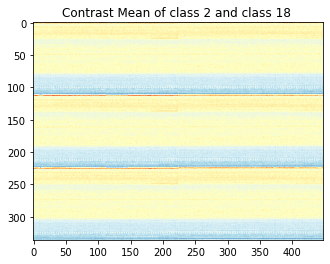

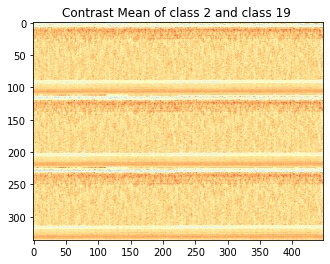

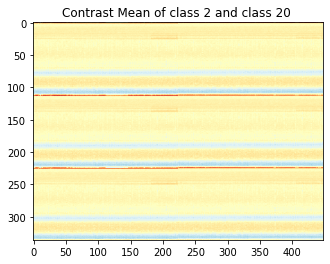

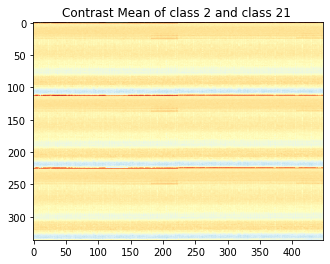

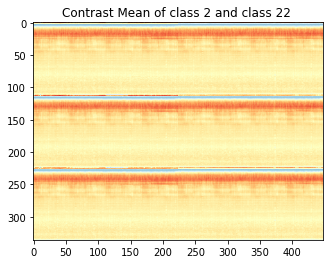

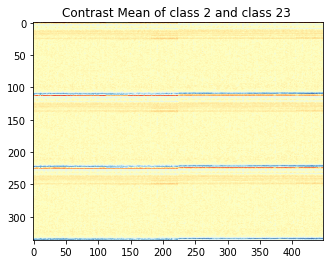

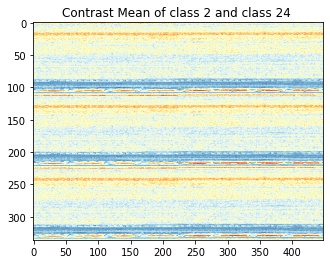

In [221]:
# view diff from class x to all other classes
x = 2
for i in range(0,25):
  create_differntial_mean(mean_dict,x,i)



448